In [40]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 

In [14]:
Wine = pd.read_csv("C:\\Users\\jonna\\Desktop\\E DATA ANALYSIS\\datasets\\wine.csv")  
Wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
class_label             178 non-null int64
class_name              178 non-null object
alcohol                 178 non-null float64
malic_acid              178 non-null float64
ash                     178 non-null float64
alcalinity_of_ash       178 non-null float64
magnesium               178 non-null int64
total_phenols           178 non-null float64
flavanoids              178 non-null float64
nonflavanoid_phenols    178 non-null float64
proanthocyanins         178 non-null float64
color_intensity         178 non-null float64
hue                     178 non-null float64
od280                   178 non-null float64
proline                 178 non-null int64
dtypes: float64(11), int64(3), object(1)
memory usage: 20.9+ KB


In [4]:
type(Wine)

pandas.core.frame.DataFrame

In [5]:
Wine.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Checking for Missing Values

In [6]:
Wine[Wine.isnull().any(axis=1)]    

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline


### OUTLIER DECTECTION USING IQR Approach

In [23]:
Q1 = Wine['malic_acid'].quantile(.25)
Q3 = Wine['malic_acid'].quantile(.75)
IQR = Q3-Q1
UppWskr = Q3+1.5*IQR
outlier = Wine[Wine['malic_acid']>UppWskr]
outlier

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
123,2,Grignolino,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.6,0.73,3.10,380
137,3,Barbera,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.0,0.82,1.69,515
173,3,Barbera,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740


In [24]:
Q1 = Wine['hue'].quantile(.25)
Q3 = Wine['hue'].quantile(.75)
IQR = Q3-Q1
UppWskr = Q3+1.5*IQR
outlier = Wine[Wine['hue']>UppWskr]
outlier

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
115,2,Grignolino,11.03,1.51,2.2,21.5,85,2.46,2.17,0.52,2.01,1.9,1.71,2.87,407


## outlier Detection using Box Plot

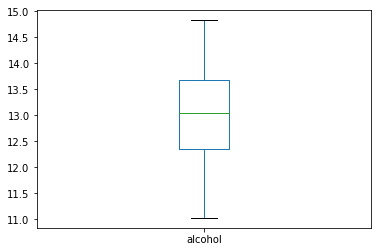

In [9]:
Wine.alcohol.plot(kind='box')
plt.show()

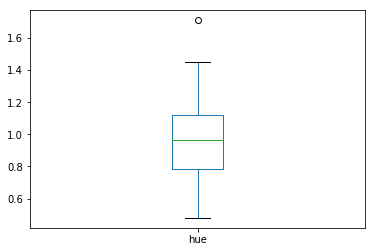

In [10]:
Wine.hue.plot(kind='box')
plt.show()

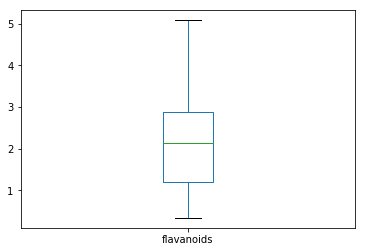

In [11]:
Wine.flavanoids.plot(kind='box')
plt.show()

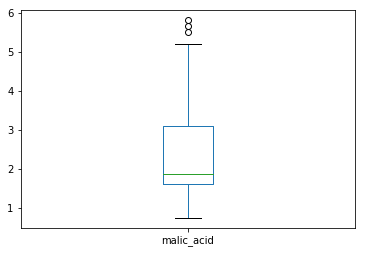

In [12]:
Wine.malic_acid.plot(kind='box')
plt.show()

### STANDARDIZING the FEATURES

In [15]:
from sklearn.preprocessing import StandardScaler

In [29]:
# Separating out the features
x= Wine.drop(['class_name','class_label'],axis=1)
# Separating out the target
y = Wine.loc[:,['class_label']].values ####### As Target Variable should always be Numerical 
# Standardizing the features
x = StandardScaler().fit_transform(x)
print (x)
print (y)

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]

#### Applying PCA

In [25]:
from sklearn.decomposition import PCA


In [65]:
pca = PCA(n_components=13)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['comp1', 'comp2','comp3', 'comp4','comp5', 'comp6','comp7', 'comp8','comp9', 'comp10','comp11', 'comp12','comp13'])
principalDf

,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,comp9,comp10,comp11,comp12,comp13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
5,3.050254,-2.122401,-0.629396,-0.515637,-0.632019,0.123431,0.401654,0.394893,-0.152146,-0.101996,0.405585,-0.379433,0.145155
6,2.449090,-1.174850,-0.977095,-0.065831,-1.027762,-0.620121,0.052891,-0.371934,-0.457016,1.016563,-0.442433,0.141230,-0.271778
7,2.059437,-1.608963,0.146282,-1.192608,0.076903,-1.439806,0.032376,0.232979,0.123370,0.735600,0.293555,0.379663,-0.110164
8,2.510874,-0.918071,-1.770969,0.056270,-0.892257,-0.129181,0.125285,-0.499578,0.606589,0.174107,-0.508933,-0.635249,0.142084
9,2.753628,-0.789438,-0.984247,0.349382,-0.468553,0.163392,-0.874352,0.150580,0.230489,0.179420,0.012478,0.550327,-0.042455


#####  Printing the Cumulative Sum of Transformed Features

In [35]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
CUM_PROP = pca.explained_variance_ratio_.cumsum()
CUM_PROP

[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

ValueError: x and y must be the same size

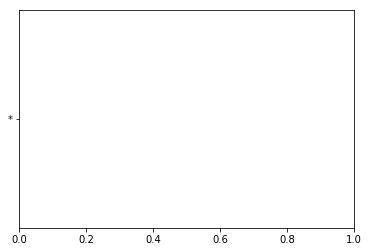

In [43]:
plt.scatter(CUM_PROP,'*')
plt.show()

#    APPlYING LOGISTIC REGRESSION

#### Without PCA --- Applying Train-Test Split

In [44]:
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as snf

In [47]:
Wine['class_label'].value_counts()

2    71
1    59
3    48
Name: class_label, dtype: int64

In [72]:
x1 = Wine.drop(['class_label','class_name'],axis=1)
y1 = Wine['class_label']

In [50]:
lr1=LogisticRegression()

In [51]:
from sklearn.model_selection import train_test_split

In [73]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.3,random_state=2)

In [53]:
lr1.fit(x1_train,y1_train)
y1_predict=lr1.predict(x1_test)

In [54]:
from sklearn import metrics

y1_acc = metrics.accuracy_score(y1_test,y1_predict)
y1_acc

0.9444444444444444

In [55]:
y1_cm = metrics.confusion_matrix(y1_test,y1_predict)
y1_cm

array([[18,  2,  0],
       [ 0, 20,  0],
       [ 0,  1, 13]], dtype=int64)

  #### Accuracy With PCA

In [66]:
x2 = principalDf
y2 = Wine['class_label']

lr2=LogisticRegression()

from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=0.3,random_state=2)
lr2.fit(x2_train,y2_train)
y2_predict=lr2.predict(x2_test)


from sklearn import metrics
y2_acc = metrics.accuracy_score(y2_test,y2_predict)
y2_acc




1.0

#####     %   Accuracy with N_components=5     &     N_components=8

In [64]:
    ##### N=5 Components

pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf_5 = pd.DataFrame(data = principalComponents
             , columns = ['comp1', 'comp2','comp3', 'comp4','comp5'])
principalDf_5

,comp1,comp2,comp3,comp4,comp5
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655
2,2.516740,-1.031151,0.982819,0.724902,-0.251033
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842
4,1.008908,-0.869831,2.026688,-0.409766,0.298458
5,3.050254,-2.122401,-0.629396,-0.515637,-0.632019
6,2.449090,-1.174850,-0.977095,-0.065831,-1.027762
7,2.059437,-1.608963,0.146282,-1.192608,0.076903
8,2.510874,-0.918071,-1.770969,0.056270,-0.892257
9,2.753628,-0.789438,-0.984247,0.349382,-0.468553


In [68]:
x5 = principalDf_5
y5= Wine['class_label']

lr_5=LogisticRegression()

from sklearn.model_selection import train_test_split
x5_train,x5_test,y5_train,y5_test = train_test_split(x5,y5,test_size=0.3,random_state=2)
lr_5.fit(x5_train,y5_train)
y5_predict=lr_5.predict(x5_test)


from sklearn import metrics
y5_acc = metrics.accuracy_score(y5_test,y5_predict)
y5_acc

0.9814814814814815

                              ####   N-Components =8

In [69]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)
principalDf_8 = pd.DataFrame(data = principalComponents
             , columns = ['comp1', 'comp2','comp3', 'comp4','comp5', 'comp6','comp7', 'comp8'])
principalDf_8

,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700
5,3.050254,-2.122401,-0.629396,-0.515637,-0.632019,0.123431,0.401654,0.394893
6,2.449090,-1.174850,-0.977095,-0.065831,-1.027762,-0.620121,0.052891,-0.371934
7,2.059437,-1.608963,0.146282,-1.192608,0.076903,-1.439806,0.032376,0.232979
8,2.510874,-0.918071,-1.770969,0.056270,-0.892257,-0.129181,0.125285,-0.499578
9,2.753628,-0.789438,-0.984247,0.349382,-0.468553,0.163392,-0.874352,0.150580


In [70]:
x8 = principalDf_8
y8= Wine['class_label']

lr_8=LogisticRegression()

from sklearn.model_selection import train_test_split
x8_train,x8_test,y8_train,y8_test = train_test_split(x8,y8,test_size=0.3,random_state=2)
lr_8.fit(x8_train,y8_train)
y8_predict=lr_8.predict(x8_test)


from sklearn import metrics
y8_acc = metrics.accuracy_score(y8_test,y8_predict)
y8_acc

1.0

                          ##### SPECIFICITY  (PRECISION) ---For 13-components

In [74]:
print(metrics.classification_report(y1_test,y1_predict))

             precision    recall  f1-score   support

          1       1.00      0.90      0.95        20
          2       0.87      1.00      0.93        20
          3       1.00      0.93      0.96        14

avg / total       0.95      0.94      0.95        54



                           ##### SPECIFICITY  (PRECISION) ---For 5-components

In [76]:
print(metrics.classification_report(y5_test,y5_predict))

             precision    recall  f1-score   support

          1       1.00      0.95      0.97        20
          2       0.95      1.00      0.98        20
          3       1.00      1.00      1.00        14

avg / total       0.98      0.98      0.98        54



                            ##### SPECIFICITY  (PRECISION) ---For 8-components

In [75]:
print(metrics.classification_report(y8_test,y8_predict))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        20
          2       1.00      1.00      1.00        20
          3       1.00      1.00      1.00        14

avg / total       1.00      1.00      1.00        54

